In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
from matplotlib import axes, pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from pickle import dump
from pickle import load
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from IPython.display import Image


**Import dataset using pandas read_csv function*

In [ ]:
df=pd.read_csv(r"/content/data_banknote_authentication.txt")

In [ ]:
df.shape

(1371, 5)

**Naming the coloums of dataset**

In [ ]:
df.columns=['Variance','Skewness','Kurtosis','Entropy','Class']

In [ ]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


**checking the datatype**

In [ ]:
df.dtypes

Variance    float64
Skewness    float64
Kurtosis    float64
Entropy     float64
Class         int64
dtype: object

**Summerizing the dataset*

In [ ]:
df.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


**Checking for any missing value**

In [ ]:
df.isna().sum()

Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Class       0
dtype: int64

**Chacking for any duplicate value**

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1366    False
1367    False
1368    False
1369    False
1370    False
Length: 1371, dtype: bool

**Cheking of how many outputs(classes) present in data**

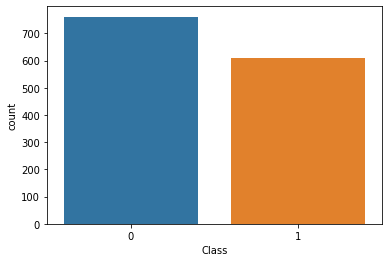

In [ ]:
sns.countplot(x=df["Class"])


**Checking the correlation between the data**

In [ ]:
df_corr=df[['Variance','Skewness','Kurtosis','Entropy','Class']].corr()

In [ ]:
df_corr

,Variance,Skewness,Kurtosis,Entropy,Class
Variance,1.000000,0.263333,-0.380358,0.276666,-0.724655
Skewness,0.263333,1.000000,-0.786729,-0.526896,-0.444281
Kurtosis,-0.380358,-0.786729,1.000000,0.319219,0.155346
Entropy,0.276666,-0.526896,0.319219,1.000000,-0.023200
Class,-0.724655,-0.444281,0.155346,-0.023200,1.000000


**Plotting the correlation graph for better visualisation **

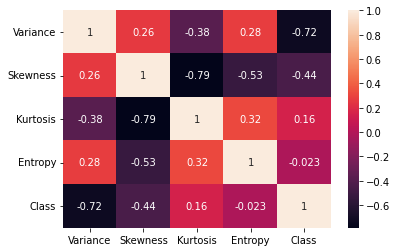

In [ ]:
sns.heatmap(df_corr,annot=True)

**Plotting histogram to know the distribustion of data**

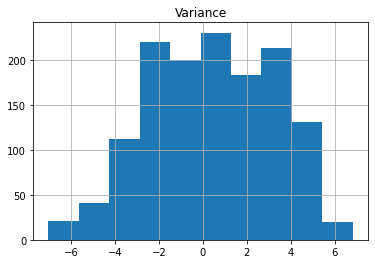

In [ ]:
df.hist(column='Variance');

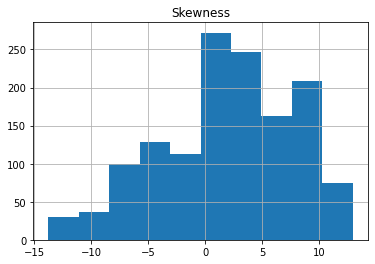

In [ ]:
df.hist(column='Skewness');

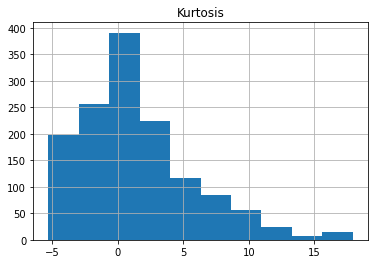

In [ ]:
df.hist(column='Kurtosis');

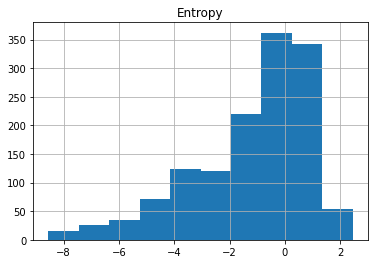

In [ ]:
df.hist(column='Entropy');

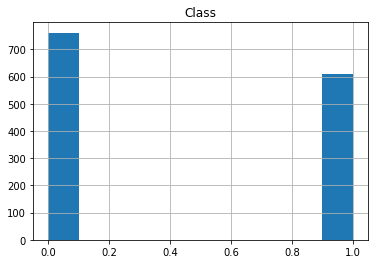

In [ ]:
df.hist(column='Class');

**Checking the outliner in the dataset**

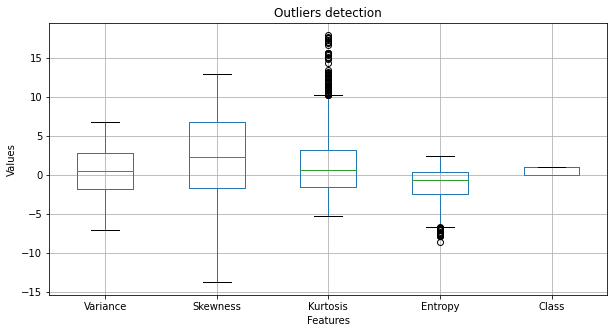

In [ ]:
# Check for outliers
ax = df.boxplot(figsize=(10,5))
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Outliers detection')
plt.show()

**Convert outliner values in nan value**

In [ ]:
for x in ['Entropy']:
    q70,q30= np.percentile(df.loc[:,x],[70,30])
    intr_qr = q70-q30
 
    max = q70+(1.5*intr_qr)
    min = q30-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
for x in ['Kurtosis']:
    q70,q30= np.percentile(df.loc[:,x],[70,30])
    intr_qr = q70-q30
 
    max = q70+(1.5*intr_qr)
    min = q30-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

**Count outliners(nan)**

In [ ]:
df.isnull().sum()

Variance      0
Skewness      0
Kurtosis    138
Entropy      95
Class         0
dtype: int64

**Drop the outliners(nan)values**

In [ ]:
df = df.dropna(axis = 0)

**Recheck the outliners if any present**

In [ ]:
df.isnull().sum()

Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Class       0
dtype: int64

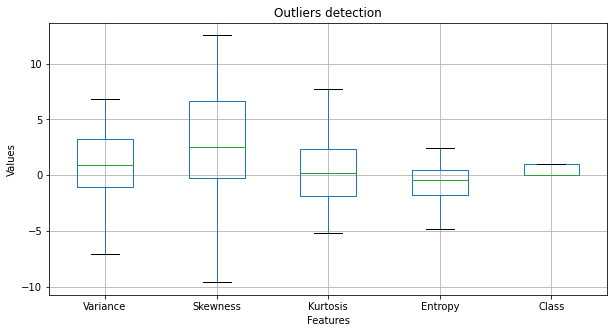

In [ ]:
# Check for outliers
ax = df.boxplot(figsize=(10,5))
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Outliers detection')
plt.show()

**Cheking the shap of dataset to know how many values present in data after dropping Outliners**

In [ ]:
df.shape

(1138, 5)

**Split the data into training testing and validation and load data in models to know the accuracy**

In [ ]:



#Standardizing the data
arr=df.values
#separate the Input and Output
x=arr[:,0:4]
y=arr[:,4]
scaler=StandardScaler().fit(x)
rescale_x=scaler.fit_transform(x)
set_printoptions(precision=3)
#print(rescale_x[0:5,:])

#split dataset
x=arr[:,0:4]
y=arr[:,4]
validation_siz=0.20

seed=55
x_train , x_validation , y_train , y_validation = train_test_split(x, y, test_size=validation_siz, random_state=seed)
#print (y)

#check models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('RF',RandomForestClassifier()))
#Evaluate models
result=[]
names=[]
for names, model in models:
    kFold=KFold(n_splits=10,shuffle=True, random_state=seed)
    CvResults=cross_val_score(model,x_train,y_train,cv=kFold,scoring='accuracy')
    result.append(CvResults)
    
    ms="%s=%f (%f)"%(names,CvResults.mean(),CvResults.std())
    print(ms)



LR=0.997802 (0.004396)
KNN=1.000000 (0.000000)
DTC=0.981319 (0.011044)
SVM=1.000000 (0.000000)
RF=0.994505 (0.007372)



### **COMPARE** **MODELS**
---



In [ ]:
#compare model

#LogisticRegression
#Confusion matrix
LR=LogisticRegression ()
LR.fit(x_train,y_train)
pred=LR.predict(x_validation)
print(accuracy_score(y_validation,pred))
print(confusion_matrix(y_validation,pred))
print(classification_report(y_validation,pred))

#finalize model
arr=df.values
x=arr[:,0:4]
y=arr[:,4]
x_train , x_validation , y_train , y_validation = train_test_split(x, y, test_size=0.20, random_state=5)
#fit model on 20%
model=LogisticRegression()
model.fit(x_train,y_train)

#save
filename= 'best_fit.sav'
dump(model,open(filename,'wb'))

#load model
loaded_model=load(open(filename,'rb'))
result=loaded_model.score(x,y)
print('Accuracy',result*100)

1.0
[[143   0]
 [  0  85]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       143
         1.0       1.00      1.00      1.00        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

Accuracy 100.0


In [ ]:
#compare model

#RandomForestClassifier
#Confusion matrix
Rf=RandomForestClassifier ()
Rf.fit(x_train,y_train)
pred=Rf.predict(x_validation)
print(accuracy_score(y_validation,pred))
print(confusion_matrix(y_validation,pred))
print(classification_report(y_validation,pred))

#finalize model
arr=df.values
x=arr[:,0:4]
y=arr[:,4]
x_train , x_validation , y_train , y_validation = train_test_split(x, y, test_size=0.20, random_state=5)
#fit model on 30%
model=RandomForestClassifier()
model.fit(x_train,y_train)

#save
filename= 'best_fit.sav'
dump(model,open(filename,'wb'))

#load model
loaded_model=load(open(filename,'rb'))
result=loaded_model.score(x,y)
print('Accuracy',result*100)

0.9912280701754386
[[136   2]
 [  0  90]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       138
         1.0       0.98      1.00      0.99        90

    accuracy                           0.99       228
   macro avg       0.99      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228

Accuracy 99.82425307557118


In [ ]:
#Support Vector Machine
#Confusion matrix
SVM=SVC ()
SVM.fit(x_train,y_train)
pred=SVM.predict(x_validation)
print(accuracy_score(y_validation,pred))
print(confusion_matrix(y_validation,pred))
print(classification_report(y_validation,pred))

#finalize model
arr=df.values
x=arr[:,0:4]
y=arr[:,4]
x_train , x_validation , y_train , y_validation = train_test_split(x, y, test_size=0.20, random_state=5)
#fit model on 30%
model=SVC()
model.fit(x_train,y_train)

#save
filename= 'best_fit.sav'
dump(model,open(filename,'wb'))

#load model
loaded_model=load(open(filename,'rb'))
result=loaded_model.score(x,y)
print('Accuracy',result*100)

1.0
[[138   0]
 [  0  90]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       138
         1.0       1.00      1.00      1.00        90

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

Accuracy 100.0


In [ ]:
#KNeighborsClassifier
#Confusion matrix
KNN=KNeighborsClassifier ()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_validation)
print(accuracy_score(y_validation,pred))
print(confusion_matrix(y_validation,pred))
print(classification_report(y_validation,pred))

#finalize model
arr=df.values
x=arr[:,0:4]
y=arr[:,4]
x_train , x_validation , y_train , y_validation = train_test_split(x, y, test_size=0.20, random_state=5)
#fit model on 20%
model=KNeighborsClassifier()
model.fit(x_train,y_train)

#save
filename= 'best_fit.sav'
dump(model,open(filename,'wb'))

#load model
loaded_model=load(open(filename,'rb'))
result=loaded_model.score(x,y)
print('Accuracy',result*100)

1.0
[[138   0]
 [  0  90]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       138
         1.0       1.00      1.00      1.00        90

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

Accuracy 100.0


In [ ]:
#DecisionTreeClassifier
#Confusion matrix
DTC=DecisionTreeClassifier ()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_validation)
print(accuracy_score(y_validation,pred))
print(confusion_matrix(y_validation,pred))
print(classification_report(y_validation,pred))

#finalize model
arr=df.values
x=arr[:,0:4]
y=arr[:,4]
x_train , x_validation , y_train , y_validation = train_test_split(x, y, test_size=0.20, random_state=5)
#fit model on 20%
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

#save
filename= 'best_fit.sav'
dump(model,open(filename,'wb'))

#load model
loaded_model=load(open(filename,'rb'))
result=loaded_model.score(x,y)
print('Accuracy',result*100)

0.9692982456140351
[[135   3]
 [  4  86]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       138
         1.0       0.97      0.96      0.96        90

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228

Accuracy 99.38488576449912
